In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("train.csv")

In [4]:
df.shape

(1460, 81)

In [5]:
df.head(n=5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Create Custom Features

In [6]:
# Create Custom Feature: Adjusted Total Basement Area
df['AdjTotalBsmtSF'] = df['BsmtFinSF1']+df['BsmtFinSF2']+0.9*df['BsmtUnfSF']

In [7]:
# Create Custom Feature: Adjusted Total Bathroom 
df['AdjTotalBath'] = df['FullBath']+df['BsmtFullBath']+0.6*(df['HalfBath']+df['BsmtHalfBath'])

In [8]:
# Create Custom Feature: HouseAge
df['HouseAge'] = df['YrSold']-(0.6*df['YearRemodAdd']+0.4*df['YearBuilt'])

In [9]:
# Transform SalePrice to LogSalePrice 
df['LogSalePrice'] = np.log(df['SalePrice'])

In [10]:
df['AdjOutdoorSF'] = df['3SsnPorch']+df['EnclosedPorch']+df['OpenPorchSF']+df['ScreenPorch']+df['WoodDeckSF']

In [11]:
df.shape

(1460, 86)

# Helper Functions

In [12]:
def indices_of_outliers(df, column_name, stdev_threshold):
    mask_of_outliers = np.abs(df[column_name] - df[column_name].mean()) >= (stdev_threshold*df[column_name].std())
    set_of_indices_of_outliers = df.index[mask_of_outliers].tolist()
    return set_of_indices_of_outliers

# example
indices_of_outliers(df, "LotFrontage", 4)

[197, 231, 934, 1107, 1127, 1298]

In [13]:
def remove_rows_with_outliers(df, list_of_column_names, stdev_threshold):
    outlier_index = []
    for col in list_of_column_names:
        set_of_indices_of_outliers = indices_of_outliers(df, col, stdev_threshold)
        outlier_index.extend(set_of_indices_of_outliers)
    outlier_index = list(set(outlier_index))
    df_without_outliers = df.drop(df.index[outlier_index])
    return df_without_outliers

# example
list_of_column_names = ["LotFrontage", "OverallQual", "LotArea"]
remove_rows_with_outliers(df, list_of_column_names, stdev_threshold = 4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AdjTotalBsmtSF,AdjTotalBath,HouseAge,LogSalePrice,AdjOutdoorSF
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,2,2008,WD,Normal,208500,841.0,3.6,5.0,12.247694,61
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,5,2007,WD,Normal,181500,1233.6,2.6,31.0,12.109011,298
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,9,2008,WD,Normal,223500,876.6,3.6,6.4,12.317167,42
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,2,2006,WD,Abnorml,140000,702.0,2.0,58.0,11.849398,307
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,12,2008,WD,Normal,250000,1096.0,3.6,8.0,12.429216,276
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,10,2009,WD,Normal,143000,789.6,2.6,14.8,11.870600,390
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,8,2007,WD,Normal,307000,1654.3,3.0,2.4,12.634603,312
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,11,2009,WD,Normal,200000,1085.4,3.6,36.0,12.206073,667
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,4,2008,WD,Abnorml,129900,856.8,2.0,65.6,11.774520,295
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,1,2008,WD,Normal,118000,977.0,2.0,62.4,11.678440,4


# Sanity Check

In [14]:
df.loc[df["YearRemodAdd"] > df["YrSold"], ["YearRemodAdd","YrSold","YearBuilt"]]

# Age of house = YearSold - 0.6*YearRemod - 0.4*YrBuilt
# This would produce a negative age
# Proposed solution: add 1.0 year to every single house's age...then this observation would become positive

,YearRemodAdd,YrSold,YearBuilt
523,2008,2007,2007


In [15]:
# MasVnrArea = 0, but the MasVnrType is "Stone" or "BrkFace"
df.loc[df["MasVnrArea"]==0]["MasVnrType"].value_counts()

None       859
Stone        1
BrkFace      1
Name: MasVnrType, dtype: int64

# NA Imputation

In [16]:
# check NA in original df
df.isnull().sum()[df.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [17]:
### Features we will not use ###
# Alley, MasVnrArea, BsmtCond, BsmtFinType1, BsmtFinType2, Electrical, GarageType, GarageYrBlt, GarageFinish
# GarageCond, PoolQC, Fence, MiscFeature


### Features we will use ###
# LotFrontage
# MasVnrType, BsmtQual, BsmtExposure, FireplaceQu, GarageQual

In [18]:
series_names = ['BsmtExposure','BsmtQual','FireplaceQu','GarageQual']
for series_name in series_names:
    df.loc[df[series_name].isnull(),series_name] = 'None'
    print(df[series_name].value_counts(sort = True))
    print('*'*20)

No      953
Av      221
Gd      134
Mn      114
None     38
Name: BsmtExposure, dtype: int64
********************
TA      649
Gd      618
Ex      121
None     37
Fa       35
Name: BsmtQual, dtype: int64
********************
None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64
********************
TA      1311
None      81
Fa        48
Gd        14
Ex         3
Po         3
Name: GarageQual, dtype: int64
********************


In [19]:
# we have not impute missing values in LotFrontage and MasVnrType

In [20]:
# impute using neighborhood (just for now, might change later)
df['MasVnrType'] = df.groupby(['Neighborhood'])['MasVnrType'].transform(lambda x: x.fillna(x.mode()[0]))
df['LotFrontage'] = df.groupby(['Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [21]:
df.isnull().sum()[df.isnull().sum()>0]

Alley           1369
MasVnrArea         8
BsmtCond          37
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

# Function to create dummify features 

In [24]:
def dummify_categorical(df, columns):
    for col in columns:
        # value_counts (sort by frequency)
        grouped = df.groupby(col)[[col]].agg('count').rename(columns={col:'count'}).sort_values(by = "count", ascending = False)
        # dummify all categories
        df = pd.get_dummies(df, columns=[col], prefix=col, prefix_sep='_') 
        # categories with frequency less than 65
        columns_to_drop = list(grouped.loc[grouped['count']<65].index)
        columns_to_drop = [col + "_" + i for i in columns_to_drop]
        # drop dummified columns
        if len(columns_to_drop) > 0:
            df = df.drop(columns = columns_to_drop,axis = 1)
        else:
            # when all the categories have frequency higher than 70
            df = df.drop(col + "_" + grouped.index[0], axis=1)
    return df

In [62]:
df_dummified = dummify_categorical(df,['CentralAir','Exterior1st','Foundation','Functional',\
                        'LotConfig','LotShape','MasVnrType','MSZoning','PavedDrive'])
df_dummified.head(5)

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LandSlope,Neighborhood,...,LotShape_IR1,LotShape_Reg,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MSZoning_FV,MSZoning_RL,MSZoning_RM,PavedDrive_N,PavedDrive_Y
0,1,60,65.0,8450,Pave,NaN,Lvl,AllPub,Gtl,CollgCr,...,0,1,1,0,0,0,1,0,0,1
1,2,20,80.0,9600,Pave,NaN,Lvl,AllPub,Gtl,Veenker,...,0,1,0,1,0,0,1,0,0,1
2,3,60,68.0,11250,Pave,NaN,Lvl,AllPub,Gtl,CollgCr,...,1,0,1,0,0,0,1,0,0,1
3,4,70,60.0,9550,Pave,NaN,Lvl,AllPub,Gtl,Crawfor,...,1,0,0,1,0,0,1,0,0,1
4,5,60,84.0,14260,Pave,NaN,Lvl,AllPub,Gtl,NoRidge,...,1,0,1,0,0,0,1,0,0,1


# Function for ordinal variables

In [63]:
def impute_ordinal(df, list_of_dic_to_replace):
    for dic in list_of_dic_to_replace:
        df = df.replace(dic)
    return df

In [64]:
list_of_dic_to_replace = [
    {"BsmtExposure": {"Gd": 5, "Av": 4, "Mn": 3, "No": 2, "None": 0}},
    {"BsmtQual": {"Ex": 7, "Gd": 4, "TA": 2, "Fa": 1, "Po": 0, "None": 0}},
    {"ExterQual": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 1}}, # "Po": 0
    {"FireplaceQu": {"Ex": 5, "Gd": 3, "TA": 2.5, "Fa": 1.5, "Po":0, "None": 0.5}},
    {"KitchenQual": {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1}},    #"Po": 0
    {"GarageQual": {"Ex": 5, "Gd": 5, "TA": 4.5, "Fa": 2.5, "Po": 1, "None": 1}},
    {"HeatingQC": {"Ex": 3, "Gd": 2, "TA": 1.5, "Fa": 1, "Po": 0}}]

df_ordinal_dummified = impute_ordinal(df_dummified,list_of_dic_to_replace)
df_ordinal_dummified.head(5)

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LandSlope,Neighborhood,...,LotShape_IR1,LotShape_Reg,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MSZoning_FV,MSZoning_RL,MSZoning_RM,PavedDrive_N,PavedDrive_Y
0,1,60,65.0,8450,Pave,NaN,Lvl,AllPub,Gtl,CollgCr,...,0,1,1,0,0,0,1,0,0,1
1,2,20,80.0,9600,Pave,NaN,Lvl,AllPub,Gtl,Veenker,...,0,1,0,1,0,0,1,0,0,1
2,3,60,68.0,11250,Pave,NaN,Lvl,AllPub,Gtl,CollgCr,...,1,0,1,0,0,0,1,0,0,1
3,4,70,60.0,9550,Pave,NaN,Lvl,AllPub,Gtl,Crawfor,...,1,0,0,1,0,0,1,0,0,1
4,5,60,84.0,14260,Pave,NaN,Lvl,AllPub,Gtl,NoRidge,...,1,0,1,0,0,0,1,0,0,1


# Pipeline

In [65]:
list_of_continuous_columns = ['AdjTotalBsmtSF', 'GarageArea', 'GrLivArea', 'HouseAge', 'LotArea',\
                        'AdjTotalBath', 'TotRmsAbvGrd', 'AdjOutdoorSF', 'OverallQual']
df_without_outliers = remove_rows_with_outliers(df_ordinal_dummified, list_of_continuous_columns, stdev_threshold = 3)

In [66]:
list_of_dummified_categorical = ['CentralAir_N', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc',
       'Functional_Typ', 'LotConfig_Corner', 'LotConfig_CulDSac',
       'LotConfig_Inside', 'LotShape_IR1', 'LotShape_Reg',
       'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone',
       'MSZoning_FV', 'MSZoning_RL', 'MSZoning_RM', 'PavedDrive_N',
       'PavedDrive_Y']

In [67]:
list_of_ordinal_categorical = ['BsmtExposure', 'BsmtQual', 'ExterQual', 'FireplaceQu', 'GarageQual',\
'HeatingQC', 'KitchenQual'] 

In [68]:
list_of_predictors = list_of_continuous_columns+list_of_dummified_categorical+list_of_ordinal_categorical 
len(list_of_predictors)

39

In [69]:
X = df_without_outliers[list_of_predictors].values
Y = df_without_outliers['LogSalePrice'].values

In [70]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import sklearn.model_selection as ms
from sklearn.model_selection import KFold
from math import sqrt
from statistics import mean 


In [96]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state = 42)

In [97]:
# lasso = Lasso(normalize=True, alpha = 0.1)
# rmse = np.sqrt(-ms.cross_val_score(lasso, X_train, y_train, 
#                       scoring="neg_mean_squared_error",cv = 5))
# rmse

In [98]:
alphas_lasso = np.logspace(-9, -4, 100)
lasso = Lasso(normalize=True)

dic = {}
for alpha in alphas_lasso:
    lasso.set_params(alpha=alpha)
    rmse = np.sqrt(-ms.cross_val_score(lasso, X_train, y_train, 
                      scoring="neg_mean_squared_error",cv = 5))
    dic[alpha] = mean(rmse)

In [99]:
alpha_rmse = pd.DataFrame.from_dict(dic, orient='index', columns = ['RMSE']).reset_index()

Text(0,0.5,'RMSE')

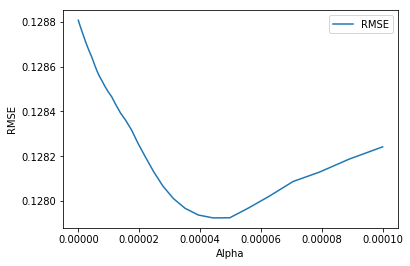

In [100]:
alpha_rmse.plot(x = "index", y = "RMSE")
plt.xlabel("Alpha")
plt.ylabel("RMSE")

In [91]:
alpha_rmse.loc[alpha_rmse['RMSE'] == min(alpha_rmse['RMSE'])]

,index,RMSE
92,0.000044,0.127924


In [ ]:
lasso = Lasso(normalize = True, alpha = 0.000044)
lasso.fit(X_train, y_train)
lasso.score